In [ ]:
import torch
from torchvision import datasets, transforms

# Define data transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

# Create data loaders
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


100%|██████████| 9912422/9912422 [00:00<00:00, 110145130.10it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 137031327.86it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 28685932.21it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 17590515.94it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



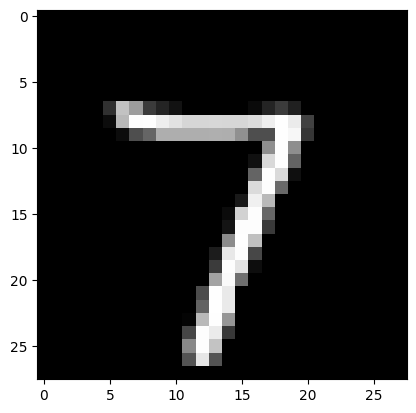

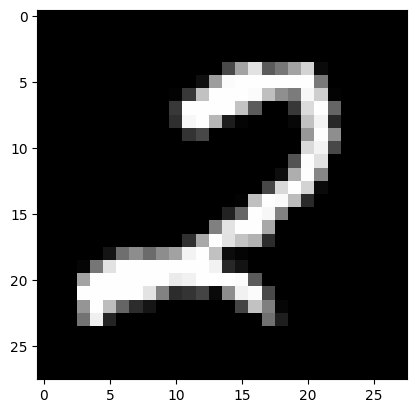

In [ ]:
import matplotlib.pyplot as plt

# Function to visualize MNIST samples
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    plt.imshow(img.squeeze(), cmap='gray')
    plt.show()

# Get a batch of training data
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Visualize a few samples
imshow(images[0])
imshow(images[1])


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Create the model instance
model = Net()


In [ ]:
import torch.optim as optim

# Hyperparameters
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
def train(model, train_loader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        for i, data in enumerate(train_loader, 0):
            inputs, labels = data

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            # Calculate the number of correctly classified images
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        # Calculate accuracy
        accuracy = 100 * correct / total

        print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}, Accuracy: {accuracy:.2f}%")

# Train the model
train(model, train_loader, criterion, optimizer)



Epoch 1, Loss: 0.3897881487698189, Accuracy: 88.53%
Epoch 2, Loss: 0.18749337731155633, Accuracy: 94.29%
Epoch 3, Loss: 0.13410272338449447, Accuracy: 95.98%
Epoch 4, Loss: 0.11005372366607824, Accuracy: 96.67%
Epoch 5, Loss: 0.09160146369600791, Accuracy: 97.16%
Epoch 6, Loss: 0.08058013093830553, Accuracy: 97.42%
Epoch 7, Loss: 0.07364319224602608, Accuracy: 97.66%
Epoch 8, Loss: 0.06474422713665208, Accuracy: 97.93%
Epoch 9, Loss: 0.05731475410182704, Accuracy: 98.10%
Epoch 10, Loss: 0.05413763096835564, Accuracy: 98.22%


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

def evaluate(model, test_loader):
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)

            y_true.extend(labels.numpy())
            y_pred.extend(predicted.numpy())

    accuracy = accuracy_score(y_true, y_pred)
    confusion = confusion_matrix(y_true, y_pred)
    report = classification_report(y_true, y_pred)

    return accuracy, confusion, report

# Evaluate the model
accuracy, confusion, report = evaluate(model, test_loader)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(report)


Accuracy: 0.975
Confusion Matrix:
[[ 969    0    0    0    0    3    1    2    3    2]
 [   0 1119    1    3    0    2    2    4    3    1]
 [   7    1  987   12    2    0    3    8   11    1]
 [   0    0    1  985    0   11    2    6    3    2]
 [   1    0    1    0  951    1    8    2    0   18]
 [   2    0    0    5    1  871    4    1    4    4]
 [   5    2    0    0    5    8  934    0    4    0]
 [   1    2    7    1    0    0    0 1006    2    9]
 [   6    0    1    6    4    8    2    4  939    4]
 [   1    1    0    5    3    4    2    3    1  989]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.96      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.96      0.98      0.97       892
           6       0.97      0.97

**Describe and explain your Result**

**Model yang telah dilatih menghasilkan akurasi pengujian sekitar 97.5%, yang merupakan indikasi baik bahwa model ini berhasil dalam mengklasifikasikan digit tulisan tangan. Confusion Matrix dan Classification Report memberikan informasi lebih lanjut tentang performa model dalam mengklasifikasikan setiap kelas digit.** **bold text** **bold text**